# Predictions

## Data wrangling

In [1]:
# Preamble
import pandas as pd
import numpy as np
pd.set_option("mode.chained_assignment", None)
import matplotlib.pyplot as plt
import lightgbm as lgb
import pyarrow.feather as feather
from os import chdir, getcwd

# sci-kit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data_dir = '/home/jovyan/work/Data/'
results_dir = '/home/jovyan/work/Results/'

In [3]:
select_features = ['reporter.ISO', 'partner.ISO', 'year',
                   'ln.Tot_IFF_t',
                   'ln.gdp_o', 'ln.gdp_d', 'ln.pop_o', 'ln.pop_d', 
                   'dist', 'contig', 
                   'comlang_off', 'comcol', 'col45', 
                   'ihs.entry_cost_o', 'ihs.entry_cost_d', 'rta',
                   'rCorrCont', 'pCorrCont',
                   'rRegQual', 'pRegQual', 
                   'rRuleLaw', 'pRuleLaw',
                   'rSecrecyScore', 'pSecrecyScore',
                   'rFSI.rank', 'pFSI.rank',
                   'rKFSI13', 'pKFSI13',
                   'rKFSI17', 'pKFSI17',
                   'rKFSI20', 'pKFSI20',
                   'rFATF', 'pFATF',
                   'ihs.tariff',
                   'kai_o', 'kai_d', 'kao_o', 'kao_d',
                   'cc_o', 'cc_d', 'cci_o', 'cci_d', 'cco_o', 'cco_d',
                   'di_o', 'di_d', 'dii_o', 'dii_d', 'dio_o', 'dio_d']
features = [       'ln.gdp_o', 'ln.gdp_d', 'ln.pop_o', 'ln.pop_d', 
                   'dist', 'contig', 
                   'comlang_off', 'comcol', 'col45', 
                   'ihs.entry_cost_o', 'ihs.entry_cost_d', 'rta',
                   'rCorrCont', 'pCorrCont',
                   'rRegQual', 'pRegQual', 
                   'rRuleLaw', 'pRuleLaw',
                   'rSecrecyScore', 'pSecrecyScore',
                   'rFSI.rank', 'pFSI.rank',
                   'rKFSI13', 'pKFSI13',
                   'rKFSI17', 'pKFSI17',
                   'rKFSI20', 'pKFSI20',
                   'rFATF', 'pFATF',
                   'ihs.tariff',
                   'kai_o', 'kai_d', 'kao_o', 'kao_d',
                   'cc_o', 'cc_d', 'cci_o', 'cci_d', 'cco_o', 'cco_d',
                   'di_o', 'di_d', 'dii_o', 'dii_d', 'dio_o', 'dio_d']

## Split into training and test samples

In [4]:
train_agg = feather.read_feather(results_dir + 'train_agg.feather')
test_agg = feather.read_feather(results_dir + 'test_agg.feather')

In [5]:
def create_smp(data, features):
    """
    Create train and test samples that are complete.
    """
    smp = data[features]
    smp.dropna(axis=0, how='any', inplace=True)
    return smp

In [6]:
train_agg_smp = create_smp(train_agg, select_features)
test_agg_smp = create_smp(test_agg, select_features)

In [25]:
feather.write_feather(train_agg_smp, results_dir + 'train_agg_smp.feather')
feather.write_feather(test_agg_smp, results_dir + 'test_agg_smp.feather')

In [7]:
Y_train = train_agg_smp[['ln.Tot_IFF_t']]
X_train = train_agg_smp[features]
Y_test = test_agg_smp[['ln.Tot_IFF_t']]
X_test = test_agg_smp[features]

In [8]:
print('X_train: ', X_train.shape, '\nX_test: ',  X_test.shape)

X_train:  (27100, 47) 
X_test:  (6454, 47)


## Linear regression

In [9]:
linear_mod = LinearRegression()  
linear_mod.fit(X_train.values, Y_train.values)

LinearRegression()

In [10]:
print(linear_mod.intercept_)
print(linear_mod.coef_)

[-21.87122891]
[[ 2.14052740e-01  9.52225739e-01  5.95008987e-01  4.87602849e-01
  -1.16431371e-04  1.86561325e+00  9.30155695e-01  2.14501772e-01
  -2.20057652e-01 -3.02766760e-01  2.39097196e-03  5.70295512e-01
   1.66372622e-02 -8.80368343e-03  1.96727642e-02  1.42637644e-02
  -9.01509677e-03  1.80885428e-02  9.23986035e-03  3.12142918e-02
  -1.63916717e-03  7.91540799e-03  7.42703695e-03  1.65741739e-01
  -1.00765047e+00 -2.26762867e+00  1.49373443e+00 -4.97851089e-01
   4.62982154e-01  3.39921672e-01 -2.80243331e-02 -7.00979047e-01
  -7.34581940e-01  1.22370492e+00  1.29528585e+00 -1.67431678e-01
  -7.47814532e-02 -4.80425513e-01 -2.31866704e-01  1.45562157e-01
   8.23037975e-02  7.63147198e-03  1.75841244e-02  6.25404564e-02
  -3.66824203e-03 -4.72775124e-02  3.88364908e-02]]


In [11]:
import statsmodels.api as sm
Xconst = sm.add_constant(X_train)
est = sm.OLS(Y_train, Xconst)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           ln.Tot_IFF_t   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1119.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        05:57:24   Log-Likelihood:                -57878.
No. Observations:               27100   AIC:                         1.158e+05
Df Residuals:                   27056   BIC:                         1.162e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -21.8712      0.687  

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
preds_LM_train = linear_mod.predict(X_train)
preds_LM_test = linear_mod.predict(X_test)

In [13]:
feather.write_feather(pd.DataFrame(preds_LM_train), results_dir + 'preds.LM.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_LM_test), results_dir + 'preds.LM.test_agg.feather')

In [14]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_LM_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_LM_train))

RMSE of the training set: 2.0478330090803865
R^2 of the training set: 0.6401083904935426


In [15]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_LM_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_LM_test))

RMSE of the test set: 2.0283947993280735
R^2 of the test set: 0.6342326635967441


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, preds_LM_test))  
print('Mean Squared Error:', mean_squared_error(Y_test, preds_LM_test))
print('Dollar Mean Squared Error:', mean_squared_error(np.exp(Y_test), np.exp(preds_LM_test)))  

Mean Absolute Error: 1.4455687233320378
Mean Squared Error: 4.1143854619411755
Dollar Mean Squared Error: 5.610483353695106e+20


## Light GBM

In [17]:
Y_train = train_agg_smp[['ln.Tot_IFF_t']]
X_train = train_agg_smp[features]
Y_test = test_agg_smp[['ln.Tot_IFF_t']]
X_test = test_agg_smp[features]

In [18]:
lightGBM_train = lgb.Dataset(X_train, Y_train)
lightGBM_test = lgb.Dataset(X_test, Y_test)

In [19]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}
lightGBM_mod = lgb.train(
    params,
    lightGBM_train,
    500,
    valid_sets = [lightGBM_train, lightGBM_test],
    valid_names = ["train", "test"],
    early_stopping_rounds = 50,
    verbose_eval = 500
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[299]	train's rmse: 0.756709	test's rmse: 1.33498


In [20]:
preds_lightGBM_train = pd.DataFrame(lightGBM_mod.predict(X_train))
preds_lightGBM_test = pd.DataFrame(lightGBM_mod.predict(X_test))

In [21]:
feather.write_feather(preds_lightGBM_train, results_dir + 'preds.lightGBM.train_agg.feather')
feather.write_feather(preds_lightGBM_test, results_dir + 'preds.lightGBM.test_agg.feather')

In [22]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_lightGBM_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_lightGBM_train))

RMSE of the training set: 0.756708998795843
R^2 of the training set: 0.9508594016041788


In [23]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_lightGBM_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_lightGBM_test))

RMSE of the test set: 1.3349810501290316
R^2 of the test set: 0.8415653587002359


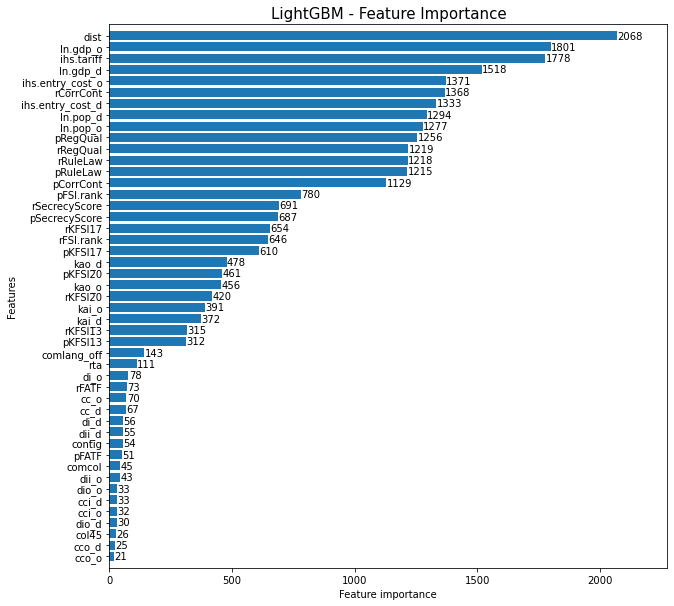

In [24]:
fig, ax = plt.subplots(figsize = (10,10))
lgb.plot_importance(lightGBM_mod, height = 0.8, ax = ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize = 15)
plt.show()

## Neural Networks

In [ ]:
Y_train = train_agg_smp[['ln.Tot_IFF']]
X_train = train_agg_smp[features]
Y_test = test_agg_smp[['ln.Tot_IFF']]
X_test = test_agg_smp[features]

In [ ]:
std_sc = StandardScaler()
NN_train = std_sc.fit_transform(X_train)
NN_test = std_sc.transform(X_test)

In [ ]:
NN_mod = MLPRegressor(hidden_layer_sizes = (10),
                      activation = "logistic",
                      random_state = 1, 
                      max_iter = 1000).fit(NN_train, Y_train.values.ravel())

In [ ]:
preds_NN_train = NN_mod.predict(NN_train)
preds_NN_test = NN_mod.predict(NN_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_NN_train), results_dir + 'preds.NN.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_NN_test), results_dir + 'preds.NN.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_NN_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_NN_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_NN_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_NN_test))

### Tuning hyperparameters

In [ ]:
NN = MLPRegressor(max_iter = 1000)
parameter_space = {
    'hidden_layer_sizes': [(10,20)],
    'activation': ['logistic', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}

In [ ]:
NN_mod_tuned = GridSearchCV(NN, parameter_space, n_jobs = -1, cv = 3)

In [ ]:
NN_mod_tuned.fit(NN_train, Y_train.values.ravel())

In [ ]:
print('Best parameters found:\n', NN_mod_tuned.best_params_)

In [ ]:
# All results
means = NN_mod_tuned.cv_results_['mean_test_score']
stds = NN_mod_tuned.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, NN_mod_tuned.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
preds_NN_train = NN_mod_tuned.predict(NN_train)
preds_NN_test = NN_mod_tuned.predict(NN_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_NN_train), results_dir + 'preds.NN.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_NN_test), results_dir + 'preds.NN.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_NN_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_NN_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_NN_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_NN_test))

## Support Vector Machine

In [ ]:
SVM_mod = svm.SVR()
SVM_mod.fit(X_train, Y_train.values.ravel())

In [ ]:
preds_SVM_train = SVM_mod.predict(X_train)
preds_SVM_test = SVM_mod.predict(X_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_SVM_train), results_dir + 'preds.SVM.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_SVM_test), results_dir + 'preds.SVM.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_SVM_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_SVM_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_SVM_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_SVM_test))

## Random Forests

In [ ]:
RF_mod = RandomForestRegressor(max_depth = 10, random_state = 1)
RF_mod.fit(X_train, Y_train.values.ravel())

In [ ]:
preds_RF_train = RF_mod.predict(X_train)
preds_RF_test = RF_mod.predict(X_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_RF_train), results_dir + 'preds.RF.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_RF_test), results_dir + 'preds.RF.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_RF_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_RF_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_RF_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_RF_test))